In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

class Adversary():
    def __init__(self, _Cbudget):
        self.Cbudget = _Cbudget
        self.currCost = 0

    def corrupt(self, a, r):
        if self.currCost >= self.Cbudget:
            return r
        if a == 1 and r == 1:
            self.currCost += 1
            return 0
        return r

def selectArm(totRew, nPulls, method, rho = 0, lmbda = 0):
    muEst = totRew / nPulls
    p = np.zeros(shape = (K, ))
    if method == 'smoothed':
        a = np.argmax(muEst)
        p[a] = 1
        p = p * (1 - rho * K) + rho


    if method == 'quantal':
        p = np.exp(lmbda * muEst)
        p /= np.sum(p)
        
    if method == 'quantalR':
        muEstMax = np.max(muEst)
        if muEstMax == 0:
            p = np.ones(shape = (K, ))
        else:
            p = np.exp(lmbda * muEst/muEstMax)
        p /= np.sum(p)

    a = np.random.choice(np.arange(0, K), p = p)
    return a

def pullArm(a, mu, totRew, nPulls, adversary):
    r = np.random.binomial(1, mu[a])
    rCorrupted = adversary.corrupt(a, r)
    totRew[a] += rCorrupted
    nPulls[a] += 1

    return r

def runExperiment(T, C, mu, K, method, rho = 0, lmbda = 0):
    totRew = np.zeros(shape = (K, ))
    nPulls = np.ones(shape = (K, ))

    collRew = []
    optRew = []

    subOptPulls = []

    nSubPulls = 0

    curCollRew = 0
    curOptRew = 0

    adversary = Adversary(C)

    for t in range(T):
        a = selectArm(totRew, nPulls, method, rho, lmbda)

        curCollRew += pullArm(a, mu, totRew, nPulls, adversary)
        curOptRew += mu[1]

        if a == 0:
            nSubPulls += 1

        subOptPulls.append(nSubPulls)

        collRew.append(curCollRew)
        optRew.append(curOptRew)

    return collRew, subOptPulls, optRew

38760 37745


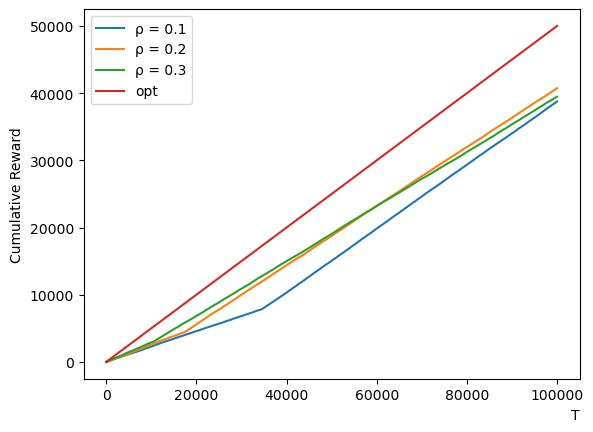

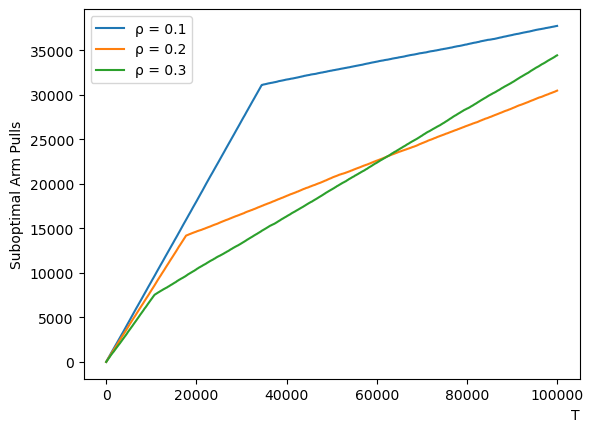

In [3]:
# run experiments on smoothed respones

T = 10 ** 5
C = 10 ** 3
mu = [0.2, 0.5]
K = 2


collRewDict = {}
subOptPulls = {}

collRew1, subOptPulls1, optRew = runExperiment(T, C, mu, K, method = 'smoothed', rho = .1)

collRew2, subOptPulls2, optRew = runExperiment(T, C, mu, K, method = 'smoothed', rho = .2)

collRew3, subOptPulls3, _ = runExperiment(T, C, mu, K, method = 'smoothed', rho = .3)

#print (collRewDict[0.1][-1])
#print (collRewDict[0.2][-1])

print (collRew1[-1], subOptPulls1[-1])

allRew1 = []
allRew2 = []
allRew3 = []
allSubPull1 = []
allSubPull2 = []
allSubPull3 = []

# for i in range(2):
#     collRew1, subOptPulls1, optRew = runExperiment(T, C, mu, K, method = 'smoothed', rho = .1)

#     collRew2, subOptPulls2, _ = runExperiment(T, C, mu, K, method = 'smoothed', rho = .2)

#     collRew3, subOptPulls3, _ = runExperiment(T, C, mu, K, method = 'smoothed', rho = .3)
    
#     allRew1.append(collRew1)
    

# x = np.arange(0, T)
# std = np.std(allRew1, axis = 0)
# print (std)

# plt.errorbar(x[::10**4], collRew1[::10**4], std[::10**4], linestyle='None', marker='.')
# plt.show()

# plt.plot(collRew1, label = 'ρ = 0.1')

# # Shade the area between y - std and y + std
# plt.fill_between(x, collRew1 - std, collRew1 + std, color='b', alpha=0.2, label='Std Dev')

plt.plot(collRew1, label = 'ρ = 0.1')
plt.plot(collRew2, label = 'ρ = 0.2')
plt.plot(collRew3, label = 'ρ = 0.3')
plt.plot(optRew, label = 'opt')
plt.legend(loc="upper left")
plt.ylabel('Cumulative Reward')
plt.xlabel("T", loc = 'right')
plt.savefig('smoothedReward.png')
plt.show()


plt.plot(subOptPulls1, label = 'ρ = 0.1')
plt.plot(subOptPulls2, label = 'ρ = 0.2')
plt.plot(subOptPulls3, label = 'ρ = 0.3')
plt.legend(loc="upper left")
plt.xlabel("T", loc = 'right')
plt.ylabel('Suboptimal Arm Pulls')
plt.savefig('smoothedPulls.png')
plt.show()

# 39009 36878
# 39181 37448
# 38609 38611
# 39153 37000
# 38937 36417


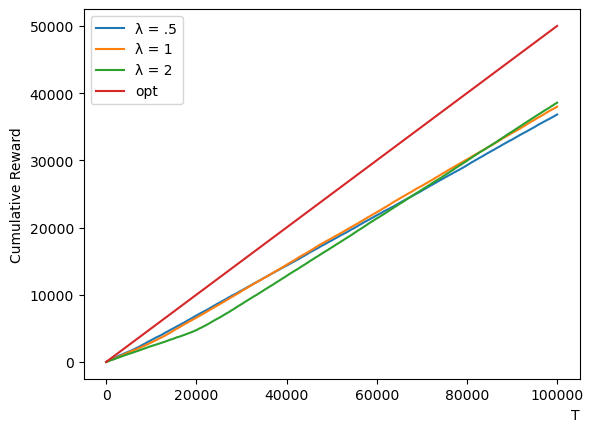

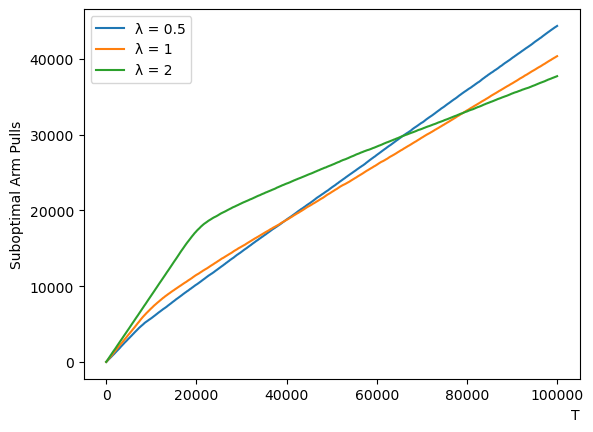

In [5]:
# run experiments on quantal response
T = 10 ** 5
C = 10 ** 3
mu = [0.2, 0.5]
K = 2


collRewDict = {}
subOptPulls = {}

collRew1, subOptPulls1, optRew = runExperiment(T, C, mu, K, method = 'quantalR', lmbda = .5)

collRew2, subOptPulls2, optRew = runExperiment(T, C, mu, K, method = 'quantalR', lmbda = 1)

collRew3, subOptPulls3, _ = runExperiment(T, C, mu, K, method = 'quantalR', lmbda = 2)


plt.plot(collRew1, label = 'λ = .5')
plt.plot(collRew2, label = 'λ = 1')
plt.plot(collRew3, label = 'λ = 2')
plt.plot(optRew, label = 'opt')
plt.legend(loc="upper left")
plt.ylabel('Cumulative Reward')
plt.xlabel('T', loc = 'right')
plt.savefig('quantalR-Reward.png')
plt.show()

plt.plot(subOptPulls1, label = 'λ = 0.5')
plt.plot(subOptPulls2, label = 'λ = 1')
plt.plot(subOptPulls3, label = 'λ = 2')
plt.legend(loc="upper left")
plt.ylabel('Suboptimal Arm Pulls') 
plt.xlabel('T', loc = 'right')
plt.savefig('quantalR-Pulls.png')
plt.show()

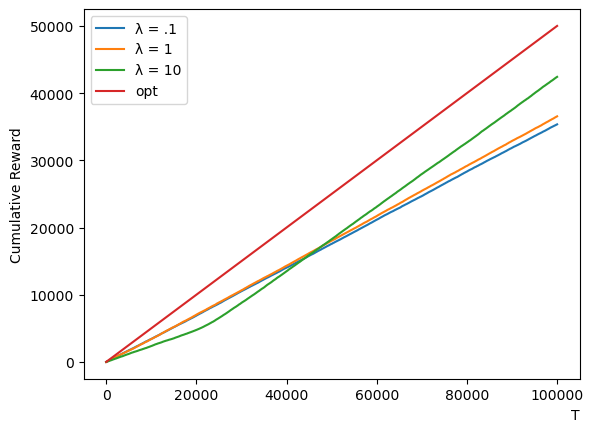

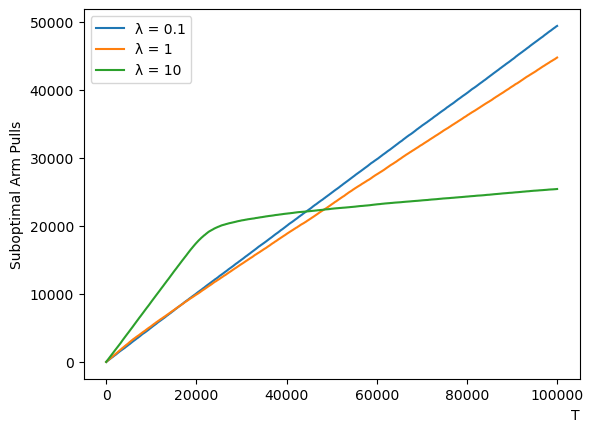

In [4]:
# run experiments on quantal respones, but use value instead of ratio (legacy, not used)

T = 10 ** 5
C = 10 ** 3
mu = [0.2, 0.5]
K = 2


collRewDict = {}
subOptPulls = {}

collRew1, subOptPulls1, optRew = runExperiment(T, C, mu, K, method = 'quantal', lmbda = .1)

collRew2, subOptPulls2, optRew = runExperiment(T, C, mu, K, method = 'quantal', lmbda = 1)

collRew3, subOptPulls3, _ = runExperiment(T, C, mu, K, method = 'quantal', lmbda = 10)


plt.plot(collRew1, label = 'λ = .1')
plt.plot(collRew2, label = 'λ = 1')
plt.plot(collRew3, label = 'λ = 10')
plt.plot(optRew, label = 'opt')
plt.legend(loc="upper left")
plt.ylabel('Cumulative Reward')
plt.xlabel('T', loc = 'right')
plt.savefig('quantalReward.png')
plt.show()

plt.plot(subOptPulls1, label = 'λ = 0.1')
plt.plot(subOptPulls2, label = 'λ = 1')
plt.plot(subOptPulls3, label = 'λ = 10')
plt.legend(loc="upper left")
plt.ylabel('Suboptimal Arm Pulls')
plt.xlabel('T', loc = 'right')
plt.savefig('quantalPulls.png')
plt.show()